In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyemma
import glob
import os


FileNotFoundError: name_of_folder/name_of_xvg_for_OF_NBCn1.xvg not found.

<Figure size 4800x4800 with 0 Axes>

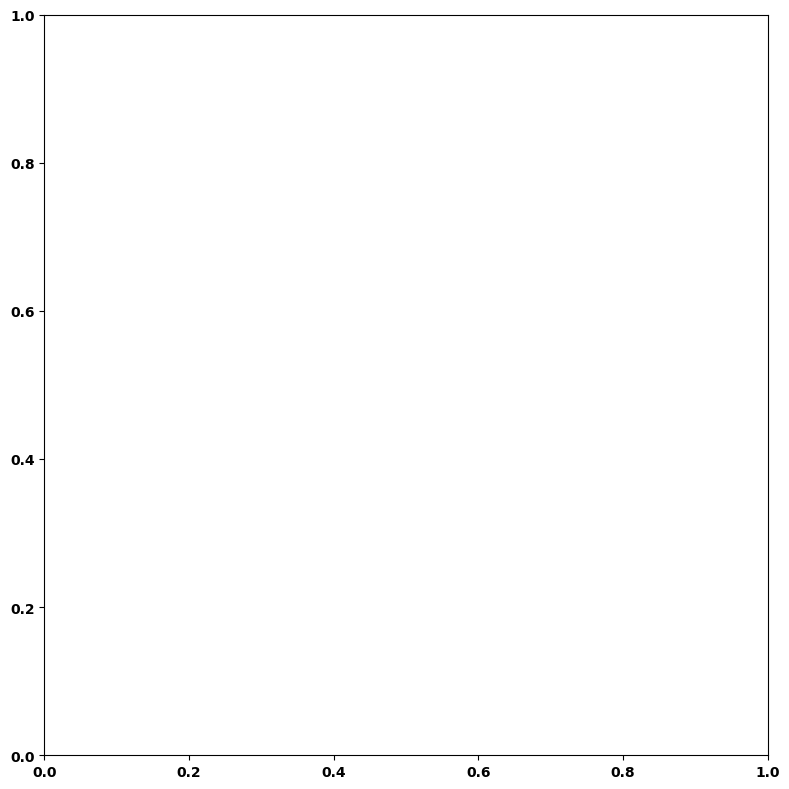

In [2]:
folder = "name_of_folder"

plt.figure(figsize = (8, 8), dpi = 600)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['lines.markersize'] = 16

#The following section combines the data from .xvg files generated with the gromacs command:
#gmx trajectory -f name_of_combined_traj_from_all_replicas.xtc -s name_of_tpr.tpr -n name_of_index.ndx -ox name_of_xvg.xvg -seltype res_com
#choosing CO3 as an available static index group in the interactive query, thus plotting the free energy corresponding to the CO3 ion density
fig,ax = plt.subplots(figsize=(8,8))
feature_file = os.path.join(folder, "name_of_xvg_for_OF_NBCn1.xvg")
raw_data = np.loadtxt(feature_file, comments = ["#", "@"])
feature_array = raw_data[:,1:]
print(np.shape(feature_array))
feature_file = os.path.join(folder, "name_of_xvg_for_IF_NBCn1.xvg")
raw_data = np.loadtxt(feature_file, comments = ["#", "@"])
feature_array = np.vstack((feature_array,raw_data[:,1:]))
print(np.shape(feature_array))
pyemma.plots.plot_free_energy(feature_array[:, 0]*-10.0, feature_array[:, 2]*10.0, nbins=50, ax=ax, legacy=False, kT=0.616, cbar_label='free energy / kcal/mol')
ax.set_xlabel('x (Å)', fontsize=16)
ax.set_xlim(-100,10)
ax.set_ylim(20,80)
ax.set_ylabel('z (Å)', fontsize=16)

fig.savefig("name_of_figure.png")
